In [1]:
import os
from dotenv import load_dotenv
from huggingface_hub import login
from datasets import load_dataset, Dataset, DatasetDict
import matplotlib.pyplot as plt

In [2]:
load_dotenv()
os.environ['HF_TOKEN2'] = os.getenv('HF_TOKEN2')

In [3]:
hf_token = os.environ['HF_TOKEN2']
login(hf_token, add_to_git_credential=True)

Token has not been saved to git credential helper.
Note: Environment variable`HF_TOKEN` is set and is the current active token independently from the token you've just configured.


Cannot authenticate through git-credential as no helper is defined on your machine.
You might have to re-authenticate when pushing to the Hugging Face Hub.
Run the following command in your terminal in case you want to set the 'store' credential helper as default.

git config --global credential.helper store

Read https://git-scm.com/book/en/v2/Git-Tools-Credential-Storage for more details.


In [34]:
# import Item class
from items import Item

In [35]:
%matplotlib inline

In [36]:
# Load in our dataset

#dataset = load_dataset("McAuley-Lab/Amazon-Reviews-2023", f"raw_meta_Appliances", split="full", trust_remote_code=True)

dataset = load_dataset("McAuley-Lab/Amazon-Reviews-2023", f"raw_meta_Musical_Instruments", split="full", trust_remote_code=True)

meta_Musical_Instruments.jsonl:   0%|          | 0.00/632M [00:00<?, ?B/s]

d:\developmentData\AI\programs\learn-llms-and-agentic-ai\11_fine-tuning-models\.venv\Lib\site-packages\huggingface_hub\file_download.py:142: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Zeeshan Hanif\.cache\huggingface\hub\datasets--McAuley-Lab--Amazon-Reviews-2023. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


Generating full split:   0%|          | 0/213593 [00:00<?, ? examples/s]

In [37]:
print(f"Number of Appliances: {len(dataset):,}")

Number of Appliances: 213,593


In [38]:
# Investigate a particular datapoint
datapoint = dataset[0]

In [39]:
# Investigate

print(datapoint["title"])
print(datapoint["description"])
print(datapoint["features"])
print(datapoint["details"])
print(datapoint["price"])

Pearl Export Lacquer EXL725S/C249 5-Piece New Fusion Drum Set with Hardware, Honey Amber
["Introducing the best selling drum set of all time... Export Series returns and this time with a lacquer finish. EXL Export Lacquer Series incorporates Pearl's S.S.T. Superior Shell Technology, Opti-Loc tom mounts, all-new 830 Series Hardware with a P-930 Pedal, and a choice of three amazing stocking finishes."]
['Item may ship in more than one box and may arrive separately', '(22x18, 10x7, 12x8, 16x16, 14x5.5)', 'P930 Demonator Pedal', '830 Hardware Pack', 'Matching snare, REMO snare batter side head']
{"Item Weight": "33 pounds", "Product Dimensions": "22 x 22 x 20 inches", "Item model number": "EXL725S/C249", "Best Sellers Rank": {"Musical Instruments": 150300, "Drum Sets": 521}, "Date First Available": "April 4, 2014", "Color Name": "Honey Amber", "Material Type": "Pearl", "Size": "-inch", "Color": "Honey Amber", "Brand": "Pearl", "Material": "Pearl", "Model Name": "EXL725S", "Item Dimensions 

In [40]:
# How many datapoints have prices?

prices = 0
for datapoint in dataset:
    try:
        price = float(datapoint["price"])
        if price > 0:
            prices += 1
    except ValueError as e:
        pass

print(f"There are {prices:,} with prices which is {prices/len(dataset)*100:,.1f}%")

There are 84,876 with prices which is 39.7%


In [41]:
# For those with prices, gather the price and the length

prices = []
lengths = []
for datapoint in dataset:
    try:
        price = float(datapoint["price"])
        if price > 0:
            prices.append(price)
            contents = datapoint["title"] + str(datapoint["description"]) + str(datapoint["features"]) + str(datapoint["details"])
            lengths.append(len(contents))
    except ValueError as e:
        pass

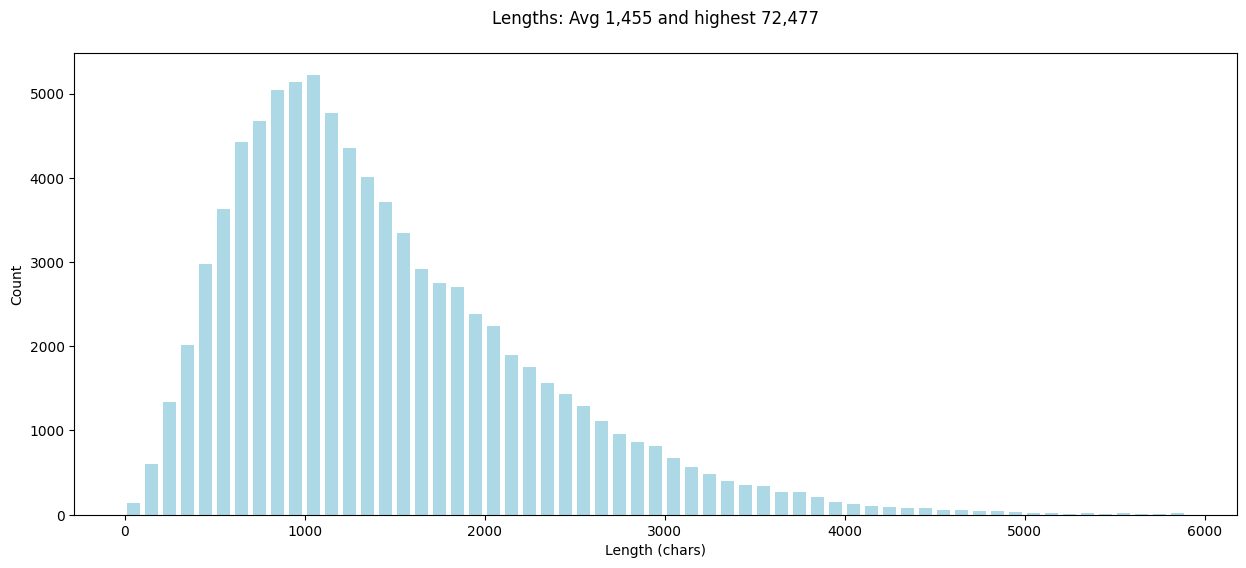

In [42]:
# Plot the distribution of lengths

plt.figure(figsize=(15, 6))
plt.title(f"Lengths: Avg {sum(lengths)/len(lengths):,.0f} and highest {max(lengths):,}\n")
plt.xlabel('Length (chars)')
plt.ylabel('Count')
plt.hist(lengths, rwidth=0.7, color="lightblue", bins=range(0, 6000, 100))
plt.show()

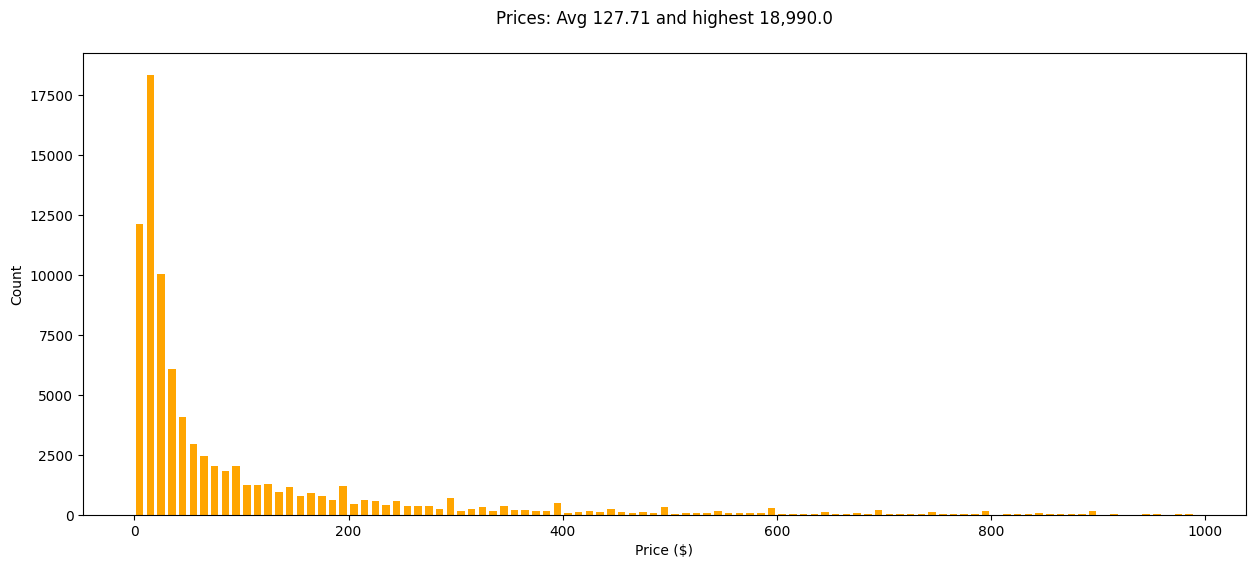

In [43]:
# Plot the distribution of prices

plt.figure(figsize=(15, 6))
plt.title(f"Prices: Avg {sum(prices)/len(prices):,.2f} and highest {max(prices):,}\n")
plt.xlabel('Price ($)')
plt.ylabel('Count')
plt.hist(prices, rwidth=0.7, color="orange", bins=range(0, 1000, 10))
plt.show()


In [44]:
# So what is this item??

for datapoint in dataset:
    try:
        price = float(datapoint["price"])
        # if price > 21000:
        if price > 18000:
            print(datapoint['title'])
    except ValueError as e:
        pass

Rane Professionl 24 Bit DJ Mixer w/Premium pe (MP2015)


In [45]:
# Create an Item object for each with a price

items = []
for datapoint in dataset:
    try:
        price = float(datapoint["price"])
        if price > 0:
            item = Item(datapoint, price)
            if item.include:
                items.append(item)
    except ValueError as e:
        pass

print(f"There are {len(items):,} items")

There are 68,183 items


In [46]:
# Look at the first item

items[0]

<Washburn Classical Series Acoustic Electric Cutaway Guitar = $399.0>

In [47]:
# Investigate the prompt that will be used during training - the model learns to complete this

print(items[0].prompt)

How much does this cost to the nearest dollar?

Washburn Classical Series Acoustic Electric Cutaway Guitar
C64SCE CLASSICAL GUITAR The cutaway allows access to the upper registers, a necessity with modern classical compositions. Its durable construction provides a new level of consistency in any performing situation. Now comes standard with the B-Band™ A3 preamp. The Washburn is truly a professional instrument. The cutaway allows access to the upper registers, a necessity with modern classical compositions Weight 5.98 pounds, Dimensions 20 x 46 x 8 inches, model number Rank Musical Instruments Guitars 8843, Is Discontinued No, Available June 2, 2008, Back Material Mahogany, Body Material Wood, Color Name SOLID SPRUCE, Fretboard Material Rosewood, Guitar Pickup

Price is $399.00


In [48]:
# Investigate the prompt that will be used during testing - the model has to complete this

print(items[0].test_prompt())

How much does this cost to the nearest dollar?

Washburn Classical Series Acoustic Electric Cutaway Guitar
C64SCE CLASSICAL GUITAR The cutaway allows access to the upper registers, a necessity with modern classical compositions. Its durable construction provides a new level of consistency in any performing situation. Now comes standard with the B-Band™ A3 preamp. The Washburn is truly a professional instrument. The cutaway allows access to the upper registers, a necessity with modern classical compositions Weight 5.98 pounds, Dimensions 20 x 46 x 8 inches, model number Rank Musical Instruments Guitars 8843, Is Discontinued No, Available June 2, 2008, Back Material Mahogany, Body Material Wood, Color Name SOLID SPRUCE, Fretboard Material Rosewood, Guitar Pickup

Price is $


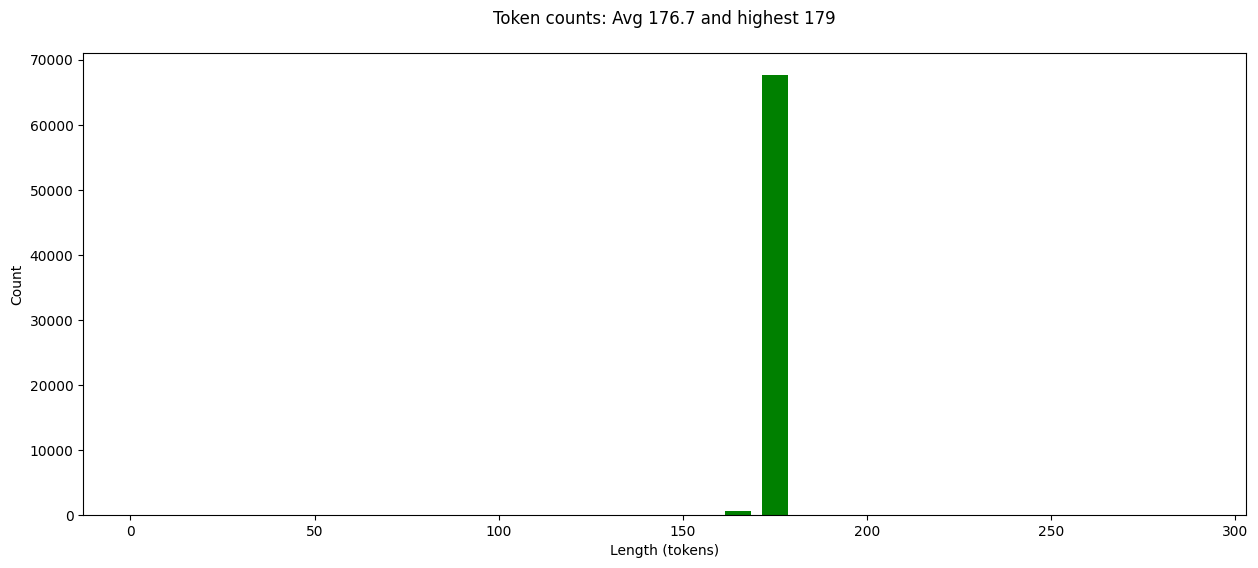

In [49]:
# Plot the distribution of token counts

tokens = [item.token_count for item in items]
plt.figure(figsize=(15, 6))
plt.title(f"Token counts: Avg {sum(tokens)/len(tokens):,.1f} and highest {max(tokens):,}\n")
plt.xlabel('Length (tokens)')
plt.ylabel('Count')
plt.hist(tokens, rwidth=0.7, color="green", bins=range(0, 300, 10))
plt.show()

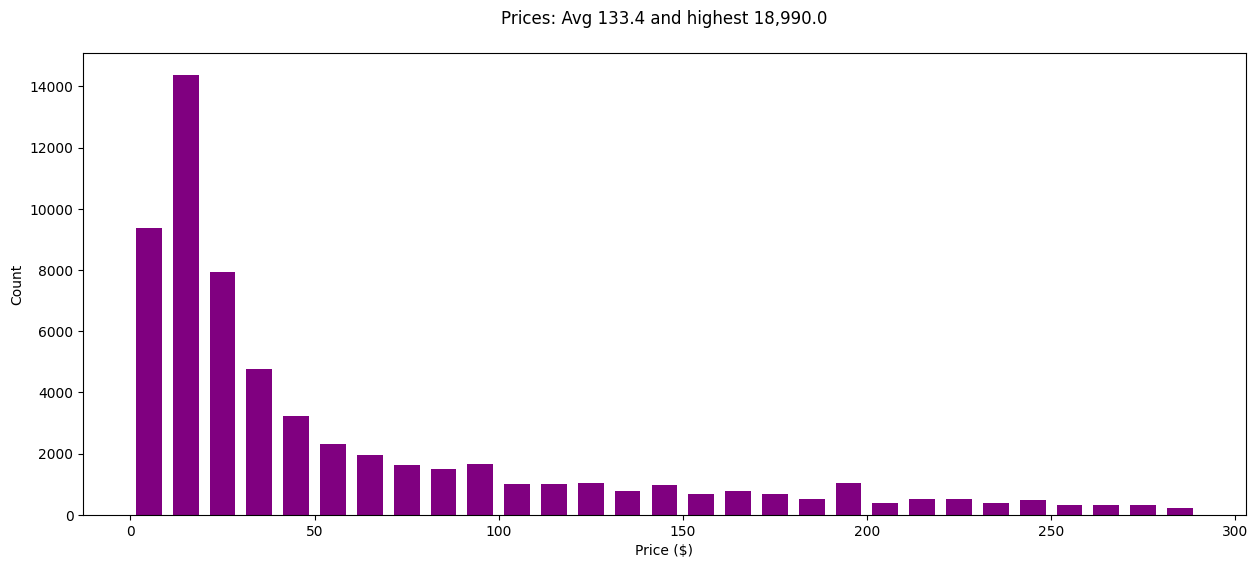

In [50]:
# Plot the distribution of prices

prices = [item.price for item in items]
plt.figure(figsize=(15, 6))
plt.title(f"Prices: Avg {sum(prices)/len(prices):,.1f} and highest {max(prices):,}\n")
plt.xlabel('Price ($)')
plt.ylabel('Count')
plt.hist(prices, rwidth=0.7, color="purple", bins=range(0, 300, 10))
plt.show()